In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [2]:
df  = pd.read_csv("/Users/devrajdutta/Downloads/MLP Files/bank_cleaned.csv")

In [3]:
df.head

<bound method NDFrame.head of        Unnamed: 0  age           job   marital  education default  balance  \
0               0   58    management   married   tertiary      no     2143   
1               1   44    technician    single  secondary      no       29   
2               2   33  entrepreneur   married  secondary      no        2   
3               5   35    management   married   tertiary      no      231   
4               6   28    management    single   tertiary      no      447   
...           ...  ...           ...       ...        ...     ...      ...   
40836       45205   25    technician    single  secondary      no      505   
40837       45206   51    technician   married   tertiary      no      825   
40838       45207   71       retired  divorced    primary      no     1729   
40839       45208   72       retired   married  secondary      no     5715   
40840       45209   57   blue-collar   married  secondary      no      668   

      housing loan  day month  du

In [4]:
df.tail

<bound method NDFrame.tail of        Unnamed: 0  age           job   marital  education default  balance  \
0               0   58    management   married   tertiary      no     2143   
1               1   44    technician    single  secondary      no       29   
2               2   33  entrepreneur   married  secondary      no        2   
3               5   35    management   married   tertiary      no      231   
4               6   28    management    single   tertiary      no      447   
...           ...  ...           ...       ...        ...     ...      ...   
40836       45205   25    technician    single  secondary      no      505   
40837       45206   51    technician   married   tertiary      no      825   
40838       45207   71       retired  divorced    primary      no     1729   
40839       45208   72       retired   married  secondary      no     5715   
40840       45209   57   blue-collar   married  secondary      no      668   

      housing loan  day month  du

In [5]:
df

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,45205,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1
40837,45206,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1
40838,45207,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1
40839,45208,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1


In [6]:
df.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response', 'response_binary'],
      dtype='object')

In [7]:
df  = pd.read_csv("/Users/devrajdutta/Downloads/MLP Files/bank_cleaned.csv")
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.job = le.fit_transform(df.job)
df.marital = le.fit_transform(df.marital)
df.loan = le.fit_transform(df.loan)

print(df)

       Unnamed: 0  age  job  marital  education default  balance housing  \
0               0   58    4        1   tertiary      no     2143     yes   
1               1   44   10        2  secondary      no       29     yes   
2               2   33    2        1  secondary      no        2     yes   
3               5   35    4        1   tertiary      no      231     yes   
4               6   28    4        2   tertiary      no      447     yes   
...           ...  ...  ...      ...        ...     ...      ...     ...   
40836       45205   25   10        2  secondary      no      505      no   
40837       45206   51   10        1   tertiary      no      825      no   
40838       45207   71    6        0    primary      no     1729      no   
40839       45208   72    6        1  secondary      no     5715      no   
40840       45209   57    1        1  secondary      no      668      no   

       loan  day month  duration  campaign  pdays  previous poutcome response  \
0     

In [12]:
print(df.isna().sum())
missing_status=df.isna().sum()

Unnamed: 0         0
age                0
job                0
marital            0
education          0
default            0
balance            0
housing            0
loan               0
day                0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
response           0
response_binary    0
dtype: int64


In [13]:
df[df.duplicated(keep = 'last')] 

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary


In [14]:
df.shape

(40841, 18)

In [15]:
df.dtypes

Unnamed: 0           int64
age                  int64
job                  int64
marital              int64
education           object
default             object
balance              int64
housing             object
loan                 int64
day                  int64
month               object
duration           float64
campaign             int64
pdays                int64
previous             int64
poutcome            object
response            object
response_binary      int64
dtype: object

In [16]:
df.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response', 'response_binary'],
      dtype='object')

In [17]:
df.sample(n=10)

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
4441,4737,30,11,1,secondary,no,142,yes,0,20,may,5.83,4,-1,0,unknown,no,0
36153,39505,36,0,1,secondary,no,1054,yes,0,25,may,3.57,1,-1,0,unknown,no,0
30946,33465,37,1,1,secondary,no,509,yes,0,20,apr,2.87,1,-1,0,unknown,no,0
7452,7909,56,0,1,secondary,no,346,yes,1,30,may,0.77,3,-1,0,unknown,no,0
16466,17462,60,7,1,secondary,no,3105,no,0,28,jul,2.97,4,-1,0,unknown,no,0
14711,15654,38,11,0,secondary,no,189,yes,1,21,jul,1.75,2,-1,0,unknown,no,0
28157,30259,42,1,2,primary,no,1628,yes,0,5,feb,1.98,1,195,8,success,no,0
22068,23353,31,4,1,tertiary,no,382,no,0,27,aug,0.72,19,-1,0,unknown,no,0
29697,32034,31,1,2,secondary,no,609,yes,0,14,apr,18.77,1,335,1,failure,no,0
13421,14324,33,2,2,tertiary,no,75,yes,0,14,jul,2.10,3,-1,0,unknown,no,0


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.job = le.fit_transform(df.job)
df.marital = le.fit_transform(df.marital)
df.loan = le.fit_transform(df.loan)
df.head(5)

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,4,1,tertiary,no,2143,yes,0,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,10,2,secondary,no,29,yes,0,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,2,1,secondary,no,2,yes,1,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,4,1,tertiary,no,231,yes,0,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,4,2,tertiary,no,447,yes,1,5,may,3.62,1,-1,0,unknown,no,0


In [19]:
df = df.fillna(0)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

x= df[['job','marital']]
y = df[['loan']]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
y_train.head()

,loan
29058,0
38366,0
28620,0
22002,0
34113,0


In [21]:
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  
y_test.head(5)

,loan
11616,1
38206,1
28205,0
7192,0
13375,0


In [22]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)

/Users/devrajdutta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [23]:
y_pred = knn.predict(x_test)

In [24]:
confusion_matrix(y_test, y_pred)

array([[7019, 1475],
       [1399,  318]])

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test, y_pred)

0.7185388306728039

In [27]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred)

(array([0.83380851, 0.17735639]),
 array([0.82634801, 0.18520676]),
 array([0.83006149, 0.18119658]),
 array([8494, 1717]))

/Users/devrajdutta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/devrajdutta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/devrajdutta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/devrajdutta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was pas

/Users/devrajdutta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/devrajdutta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/devrajdutta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/devrajdutta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was pas

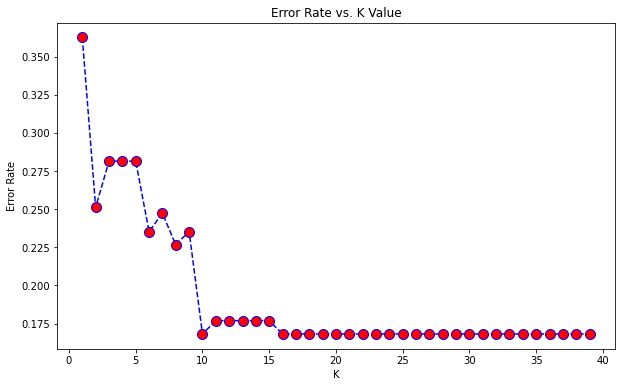

Minimum error:- 0.1681519929487807 at K = 10


In [28]:
from matplotlib import pyplot as plt
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [29]:
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn.fit(x_train, y_train)

/Users/devrajdutta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [30]:
y_pred = knn.predict(X_test)

In [31]:
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.8318480070512193

In [32]:
import os
from sklearn.compose import ColumnTransformer as ct
from sklearn.preprocessing import StandardScaler as ss
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.tree import DecisionTreeClassifier as dt

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [34]:
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
classifier = dt(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

In [36]:
print("Predicted Values : ",Y_pred[1:60])

Predicted Values :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [37]:
print("Accuracy:",accuracy_score(Y_test, Y_pred))

Accuracy: 0.8309666046420527


[Text(409.4325, 359.38, 'X[1] <= 0.549\nentropy = 0.648\nsamples = 30630\nvalue = [25557, 5073]'),
 Text(208.78500000000003, 317.09999999999997, 'X[0] <= -0.6\nentropy = 0.679\nsamples = 21995\nvalue = [18044, 3951]'),
 Text(96.72, 274.82, 'X[0] <= -0.872\nentropy = 0.72\nsamples = 8415\nvalue = [6742, 1673]'),
 Text(59.52, 232.53999999999996, 'X[0] <= -1.145\nentropy = 0.713\nsamples = 7572\nvalue = [6090, 1482]'),
 Text(29.76, 190.26, 'X[1] <= -1.095\nentropy = 0.745\nsamples = 2378\nvalue = [1874, 504]'),
 Text(14.88, 147.97999999999996, 'entropy = 0.786\nsamples = 511\nvalue = [391, 120]'),
 Text(44.64, 147.97999999999996, 'entropy = 0.733\nsamples = 1867\nvalue = [1483, 384]'),
 Text(89.28, 190.26, 'X[1] <= -1.095\nentropy = 0.698\nsamples = 5194\nvalue = [4216, 978]'),
 Text(74.4, 147.97999999999996, 'entropy = 0.703\nsamples = 509\nvalue = [412, 97]'),
 Text(104.16000000000001, 147.97999999999996, 'entropy = 0.697\nsamples = 4685\nvalue = [3804, 881]'),
 Text(133.92000000000002,

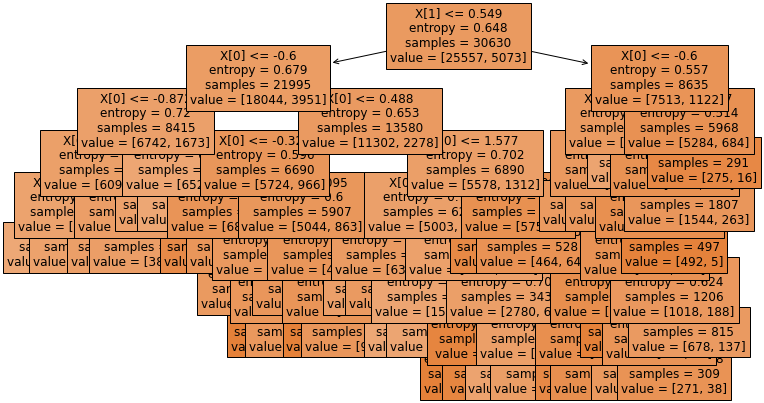

In [38]:
from sklearn import tree
plt.figure(figsize=(12,7))
tree.plot_tree(classifier, filled=True, fontsize=12)

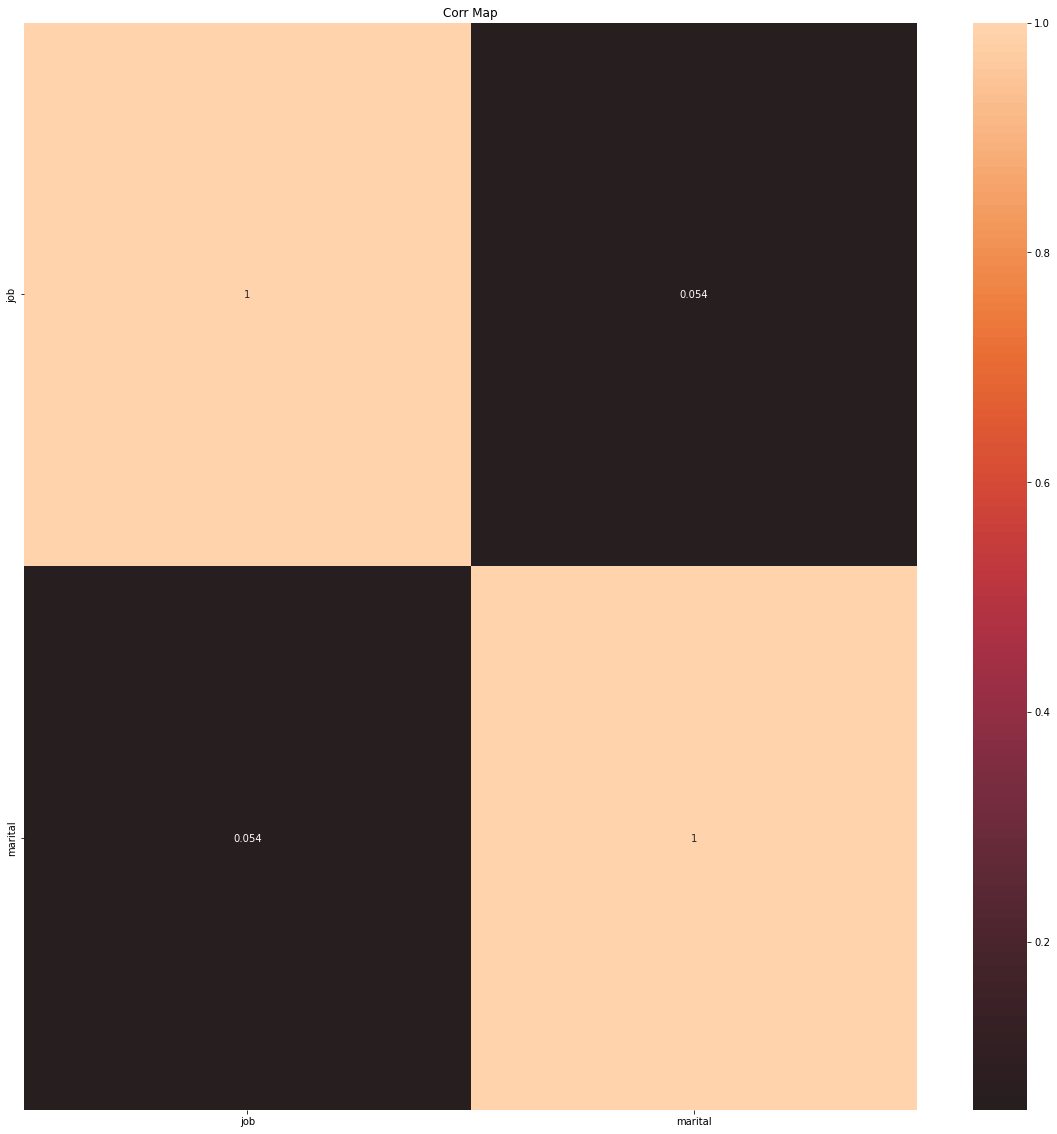

In [39]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(x.corr(), center=0, annot=True)
plt.title("Corr Map")
plt.show()

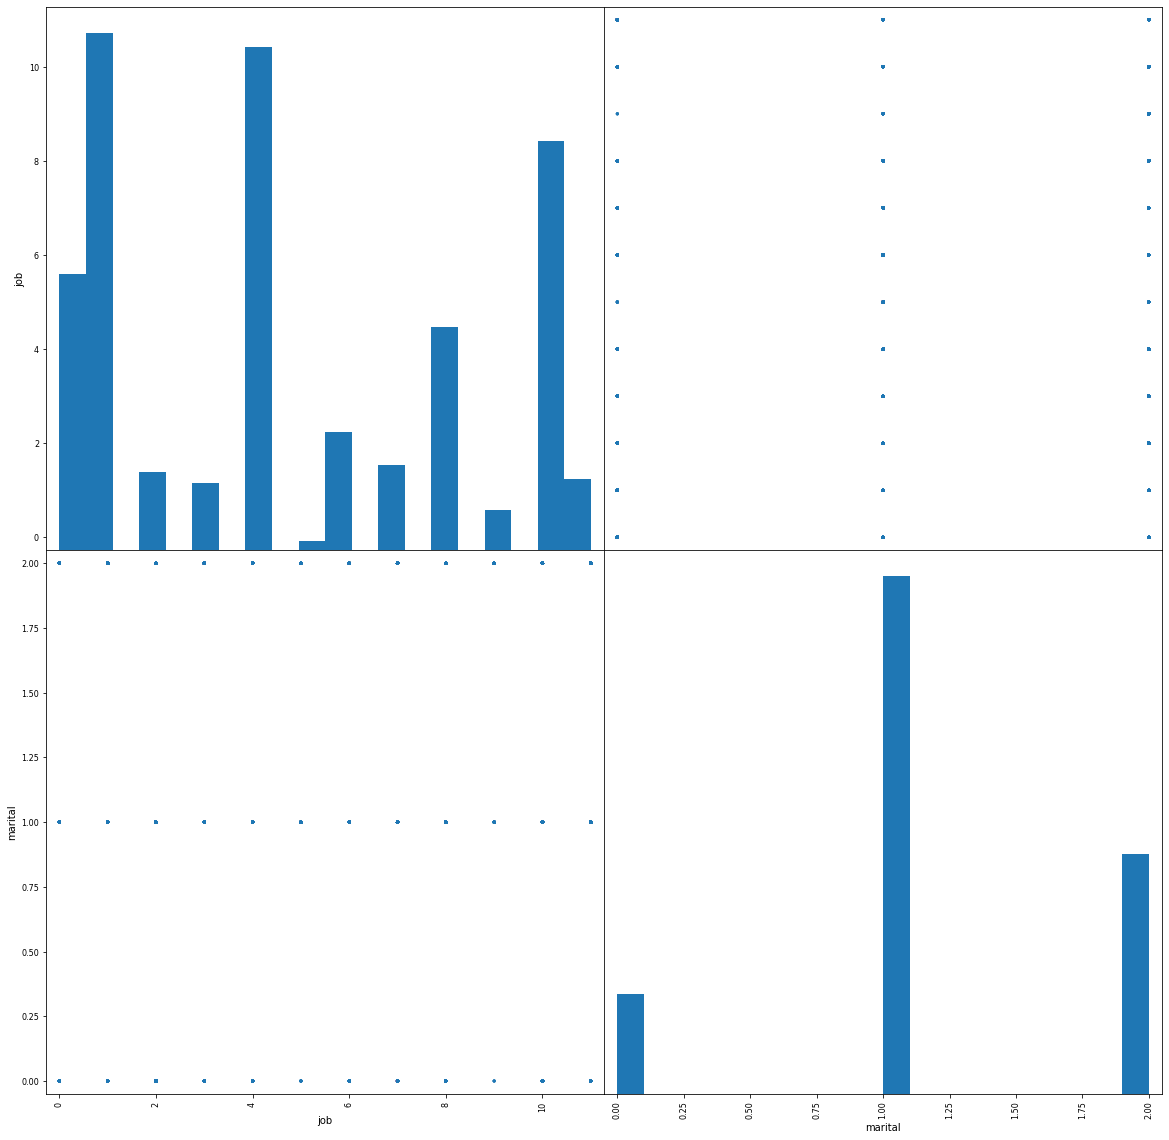

In [40]:
X_dataframe = x

grr = pd.plotting.scatter_matrix(X_dataframe, figsize=(20, 20), marker='o', hist_kwds={'bins': 20}, s=10, alpha=.8)

In [41]:
print("Accuracy:",accuracy_score(Y_test, Y_pred))

Accuracy: 0.8309666046420527
